In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IndividualProject/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle as pkl

from sklearn.model_selection import train_test_split
from Data_Preprocessing.data import *

from sklearn.model_selection import GroupKFold

In [2]:
dataset_path = './Data/0-Raw'
cleaned_path = './Data/1-cleaned'
centered_path = './Data/2-centered'
normalized_path = './Data/3-normalized'
features_path = './Data/4-features'
segmented_path = './Data/5-segmented'
leave_one_out_path = './Data/6-leave_one_out'


# Create directories
os.makedirs(cleaned_path, exist_ok=True)
os.makedirs(centered_path, exist_ok=True)
os.makedirs(normalized_path, exist_ok=True)
os.makedirs(features_path, exist_ok=True)
os.makedirs(segmented_path, exist_ok=True)
os.makedirs(leave_one_out_path, exist_ok=True)


# Participants IDs
IDs = ['001', '003', '004', '005', '115', '116', '117', '118', '120', '121',
        '122', '123', '125', '126', '127', '128', '129', '130', '131', '132',
        '133', '135', '138', '151', '152', '301', '303', '304', '305', '306',
        '307', '308', '309']

RIGHT = 11
LEFT = 12

new_columns = ['KNE_X', 'KNE_Y', 'ANK_X', 'ANK_Y', 'D3M_X', 'D3M_Y', 'D1M_X', 'D1M_Y', 'HLX_X', 'HLX_Y',
               'KNE_Vel', 'ANK_Vel', 'D3M_Vel', 'D1M_Vel', 'HLX_Vel', 'KNE_Acc', 'ANK_Acc', 'D3M_Acc', 'D1M_Acc', 'HLX_Acc']

In [3]:
new_columns = ['KNE_X', 'KNE_Y', 'ANK_X', 'ANK_Y', 'D3M_X', 'D3M_Y', 'D1M_X', 'D1M_Y', 'HLX_X', 'HLX_Y']
joints = ['KNE', 'ANK', 'D3M', 'D1M', 'HLX']

for ID in IDs:
    left_data = pd.read_csv(f'{dataset_path}/{ID}-mvmt-left.csv')
    right_data = pd.read_csv(f'{dataset_path}/{ID}-mvmt-right.csv')

    # Impute missing values
    left_data = impute_missing_values(left_data)
    right_data = impute_missing_values(right_data)

    left_data.drop(columns=['Unnamed: 0'], inplace=True)
    right_data.drop(columns=['Unnamed: 0'], inplace=True)

    left_data.columns = new_columns
    right_data.columns = new_columns

    # Save cleaned data
    left_data.to_csv(f'{cleaned_path}/{ID}_{LEFT}.csv', index=False)
    right_data.to_csv(f'{cleaned_path}/{ID}_{RIGHT}.csv', index=False)

    # Centering
    left_data = center_coordinate(left_data, "KNE")
    right_data = center_coordinate(right_data, "KNE")

    # Save centered data
    left_data.to_csv(f'{centered_path}/{ID}_{LEFT}.csv', index=False)
    right_data.to_csv(f'{centered_path}/{ID}_{RIGHT}.csv', index=False)

    # Normalize
    left_data = normalize_data(left_data)
    right_data = normalize_data(right_data)

    left_data.fillna(0, inplace=True)
    right_data.fillna(0, inplace=True)

    # Save normalized data
    left_data.to_csv(f'{normalized_path}/{ID}_{LEFT}.csv', index=False)
    right_data.to_csv(f'{normalized_path}/{ID}_{RIGHT}.csv', index=False)

     # Compute the velocity of each joint
    left_vel = compute_velocity(left_data, joints)
    right_vel = compute_velocity(right_data, joints)

    left_vel.fillna(0, inplace=True)
    right_vel.fillna(0, inplace=True)

    # Compute the acceleration of each joint
    left_acc = compute_acceleration(left_vel, joints)
    right_acc = compute_acceleration(right_vel, joints)

    left_data.fillna(0, inplace=True)
    right_data.fillna(0, inplace=True)

    # Combine data
    left_data = pd.concat([left_data, left_vel, left_acc], axis=1)
    right_data = pd.concat([right_data, right_vel, right_acc], axis=1)

    # Save features
    left_data.to_csv(f'{features_path}/{ID}_{LEFT}.csv', index=False)
    right_data.to_csv(f'{features_path}/{ID}_{RIGHT}.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'ID'}>],
       [<Axes: title={'center': 'Side Code'}>,
        <Axes: title={'center': 'Dystonia'}>],
       [<Axes: title={'center': 'Choreoathetosis'}>, <Axes: >]],
      dtype=object)

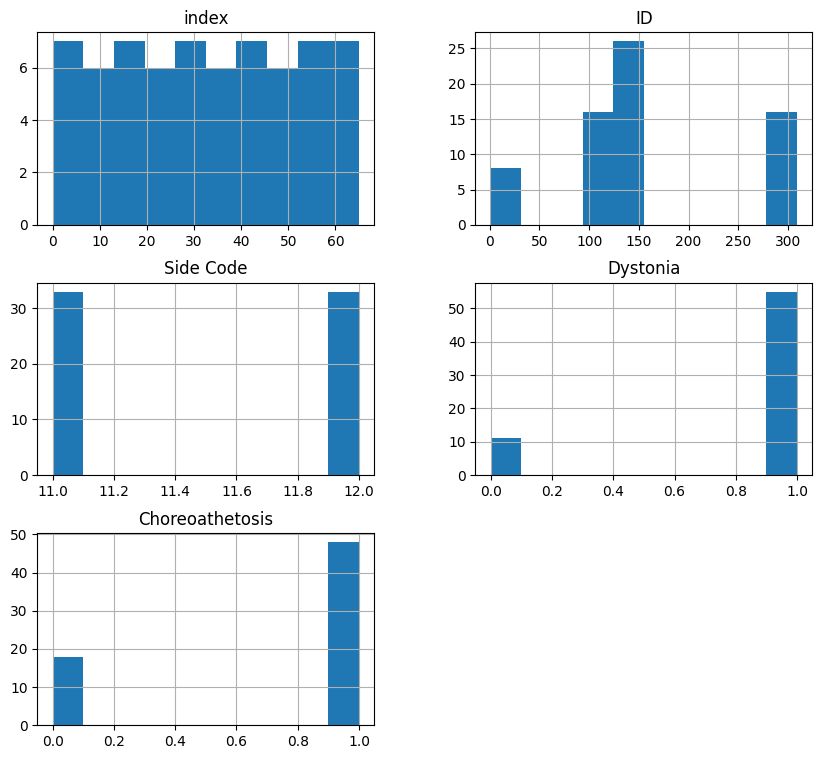

In [4]:
y_bin = pd.read_csv(f'Data/Y.csv')

# Change the Label 1 to 2 in Dystonia and Change the Label 4 to 3 in Choreoathetosis
y_bin['Dystonia-Duration'] = y_bin['Dystonia-Duration'].replace(2, 1)
y_bin['Dystonia-Duration'] = y_bin['Dystonia-Duration'].replace(3, 1)
y_bin['Dystonia-Duration'] = y_bin['Dystonia-Duration'].replace(4, 1)

y_bin['Dystonia-Amplitude'] = y_bin['Dystonia-Amplitude'].replace(2, 1)
y_bin['Dystonia-Amplitude'] = y_bin['Dystonia-Amplitude'].replace(3, 1)
y_bin['Dystonia-Amplitude'] = y_bin['Dystonia-Amplitude'].replace(4, 1)

y_bin['Choreoathetosis-Duration'] = y_bin['Choreoathetosis-Duration'].replace(4, 1)
y_bin['Choreoathetosis-Duration'] = y_bin['Choreoathetosis-Duration'].replace(3, 1)
y_bin['Choreoathetosis-Duration'] = y_bin['Choreoathetosis-Duration'].replace(2, 1)

y_bin['Choreoathetosis-Amplitude'] = y_bin['Choreoathetosis-Amplitude'].replace(2, 1)
y_bin['Choreoathetosis-Amplitude'] = y_bin['Choreoathetosis-Amplitude'].replace(3, 1)
y_bin['Choreoathetosis-Amplitude'] = y_bin['Choreoathetosis-Amplitude'].replace(4, 1)

y_bin = y_bin.drop('Choreoathetosis-Amplitude', axis=1)
y_bin = y_bin.drop('Dystonia-Amplitude', axis=1)

y_bin.rename({'Dystonia-Duration':'Dystonia'}, axis=1, inplace=True)
y_bin.rename({'Choreoathetosis-Duration':'Choreoathetosis'}, axis=1, inplace=True)
y_bin.rename({'Unnamed: 0':'index'}, axis=1, inplace=True)

y_bin.set_index('index')

y_bin.hist(figsize=(10, 9))

In [5]:
dystonia_bin = pd.Series(y_bin['Dystonia'].values, name='Dystonia')
choreoathetosis_bin = pd.Series(y_bin['Choreoathetosis'].values, name='Choreoathetosis')

In [6]:
y = pd.read_csv(f'Data/Y.csv')

# Combine the binary labels into original labels

combined = pd.concat([y, dystonia_bin, choreoathetosis_bin], axis=1)
combined = combined.drop('Unnamed: 0', axis=1)

pkl.dump(combined, open('./Data/Y_combined.pkl', 'wb'))
combined.to_csv('./Data/Y_combined.csv', index=False)

In [7]:
labels_array = y_bin.to_numpy()

labels_array.shape

(66, 5)

In [8]:
# Save the relabeled data
pkl.dump(y_bin, open(f'Data/relabeled.pkl', 'wb'))

In [9]:
def load_csv_data(pid, leg_id, data_dir="./Data/4-features"):
    csv_path = f"{data_dir}/{int(pid)}_{int(leg_id)}.csv"
    return pd.read_csv(csv_path)

In [10]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

######################################
#  Your pre-defined helper functions
######################################
def segment_data(data, label, window_size=100, overlap=0.5):
    """
    Segment data into overlapping windows of length window_size with given overlap.
    Ensures the final segment always includes the end of the data.

    data (DataFrame) : Input data with at least window_size rows.
    label (array-like): Label info used to construct segment label.
    window_size (int): Length of each segment window.
    overlap (float)  : Fraction of overlap between consecutive segments.

    Returns:
        segments (np.ndarray): shape = (num_segments, window_size, num_features)
        labels   (np.ndarray): shape = (num_segments, ?)  # expanded label info
    """
    num_samples = data.shape[0]
    stride = int(window_size * (1 - overlap))
    segments = []
    labels_list = []
    count = 0

    # If data is shorter than one window, return single segment
    if num_samples < window_size:
        segments.append(data.values)
        new_label = np.c_[
            label[None, :2],       # e.g. participant/leg IDs
            np.array([count]),     # segment index
            label[None, 2:]        # any other label columns
        ]
        labels_list.append(new_label)
        return np.array(segments), np.vstack(labels_list)

    last_start = 0
    for start in range(0, num_samples - window_size + 1, stride):
        last_start = start
        end = start + window_size
        segment = data.iloc[start:end]
        segments.append(segment.values)

        # e.g., label = [participant_id, leg_id, dystonia, choreo] (customize as needed)
        new_label = np.c_[
            label[None, :2],
            np.array([count]),
            label[None, 2:]
        ]
        labels_list.append(new_label)
        count += 1

    # If we didn't reach the end, add a final window
    if last_start + window_size < num_samples:
        start = num_samples - window_size
        end = num_samples
        segment = data.iloc[start:end]
        segments.append(segment.values)
        new_label = np.c_[
            label[None, :2],
            np.array([count]),
            label[None, 2:]
        ]
        labels_list.append(new_label)

    return np.array(segments), np.vstack(labels_list)


def reshape_data(array,
                 X_cols, Y_cols,
                 X_Vel_cols, X_Acc_cols,
                 Y_Vel_cols, Y_Acc_cols):
    """
    Reorganize data into final shape: (batch, channels, frames, joints, 1-person).
    array shape: (batch, frames, features).

    Adjust column indices to match your actual CSV format.
    """
    # Example slicing
    X      = array[..., X_cols]       # (batch, frames, len(X_cols))
    Y      = array[..., Y_cols]
    X_Vel  = array[..., X_Vel_cols]
    X_Acc  = array[..., X_Acc_cols]
    Y_Vel  = array[..., Y_Vel_cols]
    Y_Acc  = array[..., Y_Acc_cols]

    # Stack over a new dimension (channel dimension)
    # => shape: (batch, 6, frames, n_joints)
    stacked = np.stack([X, Y, X_Vel, Y_Vel, X_Acc, Y_Acc], axis=1)

    # Add final dimension for "person"
    # => shape: (batch, 6, frames, n_joints, 1)
    input_data = stacked[..., None]
    return input_data


######################################
#  Main function with LOSO + KFold
######################################
def create_loso_folders(labels,
                        data_dir="./Data/4-features",
                        out_dir="./Data/LOSO",
                        n_splits=5):
    """
    labels: np.ndarray of shape (N, 5). The columns might be:
        0: index (optional)
        1: participant_id
        2: leg_id
        3: dystonia (if you have it)
        4: choreoathetosis (if you have it)
    data_dir: directory with CSV files named like "002_1.csv" (participant_leg)
    out_dir:  where to save the processed splits
    n_splits: number of folds for KFold (train/val split)

    For each participant (LOSO):
      - Mark that participant's data as test => segment & reshape with overlap=0.2
      - For the remaining participants => do KFold for train/val
         * train => overlap=0.6
         * val   => overlap=0.2
      - Save the resulting arrays and labels to single .npy/.pkl files.
    """

    import math
    os.makedirs(out_dir, exist_ok=True)

    # Indices in 'labels' array
    IDX_PARTICIPANT = 0
    IDX_LEG         = 1

    # Example column indices for reshape_data (adjust to your actual columns!)
    X_cols       = list(range(0, 5))    # dummy example
    Y_cols       = list(range(5, 10))
    X_Vel_cols   = list(range(10, 15))
    X_Acc_cols   = list(range(15, 20))
    Y_Vel_cols   = list(range(20, 25))
    Y_Acc_cols   = list(range(25, 30))

    unique_participants = np.unique(labels[:, IDX_PARTICIPANT])

    # Loop over each participant as test set
    for pid in unique_participants:
        pid_int = int(pid)

        # Make output folder for this left-out subject
        subject_dir = os.path.join(out_dir, f"subject{pid_int}")
        os.makedirs(subject_dir, exist_ok=True)

        # 1) Identify test rows
        test_idx = np.where(labels[:, IDX_PARTICIPANT] == pid)[0]
        # 2) Identify train rows
        train_idx = np.where(labels[:, IDX_PARTICIPANT] != pid)[0]

        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        # Process TEST data (LOSO)
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        test_data_all = []
        test_labels_all = []

        for row_id in test_idx:
            row = labels[row_id]
            participant_id = int(row[IDX_PARTICIPANT])
            leg_id         = int(row[IDX_LEG])

            csv_name = f"{str(participant_id).zfill(3)}_{leg_id}.csv"
            csv_path = os.path.join(data_dir, csv_name)

            if not os.path.exists(csv_path):
                print(f"[WARN] Missing test CSV: {csv_path}")
                continue

            # Read CSV into a DataFrame
            df = pd.read_csv(csv_path)

            # Segment with overlap=0.2
            segs, seg_labels = segment_data(
                df,
                label=row,
                window_size=100,
                overlap=0.2
            )
            # Reshape each segment
            segs_reshaped = reshape_data(
                segs,
                X_cols, Y_cols,
                X_Vel_cols, X_Acc_cols,
                Y_Vel_cols, Y_Acc_cols
            )

            # Accumulate
            test_data_all.append(segs_reshaped)
            test_labels_all.append(seg_labels)

        # Concatenate all test data from this subject
        if len(test_data_all) > 0:
            test_data_all = np.concatenate(test_data_all, axis=0)
            test_labels_all = np.vstack(test_labels_all)
        else:
            # Edge case: no test data found
            test_data_all = np.array([])
            test_labels_all = np.array([])

        # Save test data/labels for this subject
        np.save(os.path.join(subject_dir, "test_data.npy"), test_data_all)
        with open(os.path.join(subject_dir, "test_labels.pkl"), "wb") as f:
            pickle.dump(test_labels_all, f)

        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        # Process TRAIN/VAL via KFold
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        if len(train_idx) == 0:
            # If there's no training data (maybe only 1 participant total), skip
            continue

        # Gather a list of (csv_name, label_row)
        train_list = []
        for i in train_idx:
            label_row = labels[i]
            p_id  = int(label_row[IDX_PARTICIPANT])
            l_id  = int(label_row[IDX_LEG])
            fname = f"{str(p_id).zfill(3)}_{l_id}.csv"
            train_list.append((fname, label_row))

        # KFold over the entire list of train items
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        all_indices = np.arange(len(train_list))

        fold_num = 0
        for train_split_idx, val_split_idx in kf.split(all_indices):
            fold_train_data = []
            fold_train_labels = []
            fold_val_data = []
            fold_val_labels = []

            # ----- Build TRAIN segments for this fold -----
            for idx in train_split_idx:
                csv_name, label_row = train_list[idx]
                csv_path = os.path.join(data_dir, csv_name)

                if not os.path.exists(csv_path):
                    print(f"[WARN] Missing train CSV: {csv_path}")
                    continue

                df = pd.read_csv(csv_path)
                # Overlap=0.6 for train
                segs, seg_labels = segment_data(
                    df,
                    label=label_row,
                    window_size=100,
                    overlap=0.6
                )
                segs_reshaped = reshape_data(
                    segs,
                    X_cols, Y_cols,
                    X_Vel_cols, X_Acc_cols,
                    Y_Vel_cols, Y_Acc_cols
                )
                fold_train_data.append(segs_reshaped)
                fold_train_labels.append(seg_labels)

            # ----- Build VAL segments for this fold -----
            for idx in val_split_idx:
                csv_name, label_row = train_list[idx]
                csv_path = os.path.join(data_dir, csv_name)

                if not os.path.exists(csv_path):
                    print(f"[WARN] Missing val CSV: {csv_path}")
                    continue

                df = pd.read_csv(csv_path)
                # Overlap=0.2 for val
                segs, seg_labels = segment_data(
                    df,
                    label=label_row,
                    window_size=100,
                    overlap=0.2
                )
                segs_reshaped = reshape_data(
                    segs,
                    X_cols, Y_cols,
                    X_Vel_cols, X_Acc_cols,
                    Y_Vel_cols, Y_Acc_cols
                )
                fold_val_data.append(segs_reshaped)
                fold_val_labels.append(seg_labels)

            # Concatenate data for this fold
            if len(fold_train_data) > 0:
                fold_train_data = np.concatenate(fold_train_data, axis=0)
                fold_train_labels = np.vstack(fold_train_labels)
            else:
                fold_train_data = np.array([])
                fold_train_labels = np.array([])

            if len(fold_val_data) > 0:
                fold_val_data = np.concatenate(fold_val_data, axis=0)
                fold_val_labels = np.vstack(fold_val_labels)
            else:
                fold_val_data = np.array([])
                fold_val_labels = np.array([])

            # ----- Save for this fold -----
            fold_dir = os.path.join(subject_dir, f"fold_{fold_num}")
            os.makedirs(fold_dir, exist_ok=True)

            np.save(os.path.join(fold_dir, "train_data.npy"), fold_train_data)
            with open(os.path.join(fold_dir, "train_labels.pkl"), "wb") as f:
                pickle.dump(fold_train_labels, f)

            np.save(os.path.join(fold_dir, "val_data.npy"), fold_val_data)
            with open(os.path.join(fold_dir, "val_labels.pkl"), "wb") as f:
                pickle.dump(fold_val_labels, f)

            fold_num += 1

    print("LOSO processing complete!")


In [11]:
labels_array = np.array(pkl.load(open(f'Data/Y_combined.pkl', 'rb')))

print(labels_array.shape)

(66, 8)


In [14]:
if __name__ == "__main__":
    # Load the labels
    labels_array = np.array(pkl.load(open(f'Data/Y_combined.pkl', 'rb')))
    create_loso_folders(labels_array,
                        data_dir=features_path,
                        out_dir=leave_one_out_path,
                        n_splits=5)

    print("Done creating LOSO folders with nested KFold for train/val.")

LOSO processing complete!
Done creating LOSO folders with nested KFold for train/val.
